In [2]:
#引入包
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#导入数据
filename = 'data2.txt'
data = np.loadtxt(filename,delimiter=',')
feature_num = data.shape[1]-1
data = data.astype('float64')
#print(data)

In [4]:
#数据划分
data_train, data_test = train_test_split(data, test_size=0.3, random_state=24)#随机划分，7：3划分

#特征缩放
maxnum = np.max(data_train,0,keepdims=True)
minnum = np.min(data_train,0,keepdims=True)
data_train = (data_train -minnum)/(maxnum -minnum)
#print(data_train)

x_train = data_train[:,:2]
x_train = np.concatenate((x_train, np.ones((x_train.shape[0],1))), axis=1)
y_train = data_train[:,2]

x_test = data_test[:,:2]
x_test = np.concatenate((x_test, np.ones((x_test.shape[0],1))),axis=1)
y_test = data_test[:,2]
print(x_test)

[[80.19018075 44.82162893  1.        ]
 [85.40451939 57.05198398  1.        ]
 [64.17698887 80.90806059  1.        ]
 [42.07545454 78.844786    1.        ]
 [47.26426911 88.475865    1.        ]
 [39.53833914 76.03681085  1.        ]
 [78.63542435 96.64742717  1.        ]
 [62.0730638  96.76882412  1.        ]
 [64.03932042 78.03168802  1.        ]
 [49.07256322 51.88321182  1.        ]
 [69.36458876 97.71869196  1.        ]
 [80.366756   90.9601479   1.        ]
 [74.24869137 69.82457123  1.        ]
 [83.90239366 56.30804622  1.        ]
 [99.8278578  72.36925193  1.        ]
 [89.84580671 45.35828361  1.        ]
 [67.37202755 42.83843832  1.        ]
 [32.57720017 95.59854761  1.        ]
 [35.28611282 47.02051395  1.        ]
 [88.91389642 69.8037889   1.        ]
 [94.09433113 77.15910509  1.        ]
 [77.92409145 68.97235999  1.        ]
 [79.94481794 74.16311935  1.        ]
 [38.7858038  64.99568096  1.        ]
 [50.28649612 49.80453881  1.        ]
 [51.04775177 45.82270146

In [5]:
#模型建立
w = np.zeros((feature_num+1,1))

#梯度下降

def Loss(h,y):
    return -np.mean(y*np.log(h)+(1-y)*np.log(1-h))#Loss function
def Logis(h):
    return 1/(1+np.exp(-h))

log = []
log_test = []
repeat = 10000
learn = 0.001
minw=0
minloss = 1
              
for i in range(repeat):
    h = np.matmul(x_train,w)
    h = Logis(h)
    term = learn*np.mean((h-y_train.reshape(-1,1))*x_train, axis=0).reshape(-1,1)
    w = w - term
    h_test = np.matmul(x_test,w)
    h_test = Logis(h_test)
   
    loss = Loss(h,y_train)
    loss_test = Loss(h_test,y_test)
    print('i:{},loss:{}'.format(i,loss))
    log.append([i,loss])
    log_test.append([i,loss_test])
    
    if minloss > loss:
        minw = w
        minloss = loss
print(minw)

i:0,loss:0.6931471805599453
i:1,loss:0.6931295838142889
i:2,loss:0.693112005025019
i:3,loss:0.6930944441766643
i:4,loss:0.6930769012537658
i:5,loss:0.6930593762408764
i:6,loss:0.6930418691225615
i:7,loss:0.6930243798833986
i:8,loss:0.6930069085079771
i:9,loss:0.6929894549808987
i:10,loss:0.6929720192867771
i:11,loss:0.6929546014102383
i:12,loss:0.6929372013359202
i:13,loss:0.692919819048473
i:14,loss:0.6929024545325588
i:15,loss:0.6928851077728521
i:16,loss:0.6928677787540389
i:17,loss:0.6928504674608178
i:18,loss:0.6928331738778992
i:19,loss:0.6928158979900058
i:20,loss:0.692798639781872
i:21,loss:0.6927813992382443
i:22,loss:0.6927641763438814
i:23,loss:0.692746971083554
i:24,loss:0.6927297834420447
i:25,loss:0.6927126134041482
i:26,loss:0.6926954609546713
i:27,loss:0.6926783260784322
i:28,loss:0.6926612087602616
i:29,loss:0.6926441089850025
i:30,loss:0.6926270267375089
i:31,loss:0.6926099620026477
i:32,loss:0.6925929147652973
i:33,loss:0.6925758850103477
i:34,loss:0.6925588727227018

i:1032,loss:0.6822135912432676
i:1033,loss:0.682208170555509
i:1034,loss:0.6822027570139072
i:1035,loss:0.6821973506118664
i:1036,loss:0.6821919513427955
i:1037,loss:0.6821865592001095
i:1038,loss:0.6821811741772288
i:1039,loss:0.6821757962675797
i:1040,loss:0.6821704254645937
i:1041,loss:0.6821650617617082
i:1042,loss:0.6821597051523663
i:1043,loss:0.6821543556300165
i:1044,loss:0.6821490131881129
i:1045,loss:0.6821436778201153
i:1046,loss:0.682138349519489
i:1047,loss:0.6821330282797051
i:1048,loss:0.6821277140942398
i:1049,loss:0.6821224069565754
i:1050,loss:0.6821171068601994
i:1051,loss:0.6821118137986053
i:1052,loss:0.6821065277652917
i:1053,loss:0.682101248753763
i:1054,loss:0.6820959767575292
i:1055,loss:0.6820907117701055
i:1056,loss:0.6820854537850132
i:1057,loss:0.6820802027957785
i:1058,loss:0.6820749587959338
i:1059,loss:0.6820697217790166
i:1060,loss:0.6820644917385699
i:1061,loss:0.6820592686681427
i:1062,loss:0.6820540525612889
i:1063,loss:0.6820488434115681
i:1064,loss

C:\Users\江一飞\AppData\Local\Temp\ipykernel_40932\1136752576.py:7: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y*np.log(h)+(1-y)*np.log(1-h))#Loss function
C:\Users\江一飞\AppData\Local\Temp\ipykernel_40932\1136752576.py:7: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y*np.log(h)+(1-y)*np.log(1-h))#Loss function


i:2333,loss:0.6793383506098619
i:2334,loss:0.6793382622524264
i:2335,loss:0.6793381758988275
i:2336,loss:0.6793380915469608
i:2337,loss:0.6793380091947232
i:2338,loss:0.6793379288400146
i:2339,loss:0.679337850480736
i:2340,loss:0.6793377741147905
i:2341,loss:0.679337699740083
i:2342,loss:0.6793376273545204
i:2343,loss:0.6793375569560117
i:2344,loss:0.6793374885424671
i:2345,loss:0.6793374221117996
i:2346,loss:0.6793373576619233
i:2347,loss:0.6793372951907545
i:2348,loss:0.6793372346962117
i:2349,loss:0.6793371761762145
i:2350,loss:0.6793371196286851
i:2351,loss:0.6793370650515472
i:2352,loss:0.6793370124427266
i:2353,loss:0.6793369618001508
i:2354,loss:0.6793369131217492
i:2355,loss:0.6793368664054528
i:2356,loss:0.6793368216491951
i:2357,loss:0.6793367788509109
i:2358,loss:0.6793367380085373
i:2359,loss:0.6793366991200128
i:2360,loss:0.679336662183278
i:2361,loss:0.6793366271962756
i:2362,loss:0.6793365941569498
i:2363,loss:0.6793365630632465
i:2364,loss:0.6793365339131141
i:2365,loss

i:3455,loss:0.6801093011989285
i:3456,loss:0.6801104936096868
i:3457,loss:0.6801116865497506
i:3458,loss:0.6801128800183802
i:3459,loss:0.6801140740148361
i:3460,loss:0.68011526853838
i:3461,loss:0.6801164635882742
i:3462,loss:0.6801176591637814
i:3463,loss:0.6801188552641653
i:3464,loss:0.6801200518886904
i:3465,loss:0.6801212490366216
i:3466,loss:0.680122446707225
i:3467,loss:0.680123644899767
i:3468,loss:0.6801248436135146
i:3469,loss:0.6801260428477359
i:3470,loss:0.6801272426016995
i:3471,loss:0.6801284428746751
i:3472,loss:0.6801296436659323
i:3473,loss:0.6801308449747422
i:3474,loss:0.6801320468003761
i:3475,loss:0.6801332491421062
i:3476,loss:0.6801344519992055
i:3477,loss:0.6801356553709476
i:3478,loss:0.6801368592566068
i:3479,loss:0.6801380636554583
i:3480,loss:0.6801392685667774
i:3481,loss:0.680140473989841
i:3482,loss:0.6801416799239259
i:3483,loss:0.6801428863683103
i:3484,loss:0.6801440933222724
i:3485,loss:0.6801453007850917
i:3486,loss:0.680146508756048
i:3487,loss:0.

i:4788,loss:0.6819530098810183
i:4789,loss:0.6819544672776086
i:4790,loss:0.6819559246643511
i:4791,loss:0.6819573820410684
i:4792,loss:0.6819588394075832
i:4793,loss:0.6819602967637185
i:4794,loss:0.6819617541092974
i:4795,loss:0.6819632114441434
i:4796,loss:0.6819646687680802
i:4797,loss:0.6819661260809313
i:4798,loss:0.6819675833825211
i:4799,loss:0.6819690406726736
i:4800,loss:0.6819704979512135
i:4801,loss:0.6819719552179653
i:4802,loss:0.681973412472754
i:4803,loss:0.6819748697154047
i:4804,loss:0.6819763269457428
i:4805,loss:0.6819777841635938
i:4806,loss:0.6819792413687836
i:4807,loss:0.6819806985611381
i:4808,loss:0.6819821557404834
i:4809,loss:0.681983612906646
i:4810,loss:0.6819850700594526
i:4811,loss:0.68198652719873
i:4812,loss:0.6819879843243052
i:4813,loss:0.6819894414360056
i:4814,loss:0.6819908985336588
i:4815,loss:0.681992355617092
i:4816,loss:0.6819938126861336
i:4817,loss:0.6819952697406115
i:4818,loss:0.6819967267803543
i:4819,loss:0.6819981838051901
i:4820,loss:0

i:5945,loss:0.6836001853166533
i:5946,loss:0.683601556363709
i:5947,loss:0.6836029273002672
i:5948,loss:0.6836042981263034
i:5949,loss:0.6836056688417935
i:5950,loss:0.6836070394467134
i:5951,loss:0.6836084099410388
i:5952,loss:0.6836097803247457
i:5953,loss:0.6836111505978099
i:5954,loss:0.683612520760208
i:5955,loss:0.6836138908119155
i:5956,loss:0.683615260752909
i:5957,loss:0.6836166305831648
i:5958,loss:0.6836180003026592
i:5959,loss:0.6836193699113685
i:5960,loss:0.6836207394092695
i:5961,loss:0.6836221087963383
i:5962,loss:0.683623478072552
i:5963,loss:0.6836248472378871
i:5964,loss:0.6836262162923203
i:5965,loss:0.6836275852358286
i:5966,loss:0.6836289540683889
i:5967,loss:0.6836303227899779
i:5968,loss:0.6836316914005731
i:5969,loss:0.6836330599001513
i:5970,loss:0.6836344282886899
i:5971,loss:0.6836357965661661
i:5972,loss:0.6836371647325571
i:5973,loss:0.6836385327878406
i:5974,loss:0.6836399007319937
i:5975,loss:0.683641268564994
i:5976,loss:0.6836426362868192
i:5977,loss:0

i:6928,loss:0.684892997101987
i:6929,loss:0.6848942565163728
i:6930,loss:0.6848955158209544
i:6931,loss:0.6848967750157501
i:6932,loss:0.6848980341007777
i:6933,loss:0.684899293076055
i:6934,loss:0.6849005519416003
i:6935,loss:0.6849018106974314
i:6936,loss:0.6849030693435667
i:6937,loss:0.6849043278800242
i:6938,loss:0.6849055863068221
i:6939,loss:0.6849068446239783
i:6940,loss:0.6849081028315112
i:6941,loss:0.6849093609294388
i:6942,loss:0.6849106189177796
i:6943,loss:0.6849118767965515
i:6944,loss:0.684913134565773
i:6945,loss:0.6849143922254622
i:6946,loss:0.6849156497756377
i:6947,loss:0.6849169072163177
i:6948,loss:0.6849181645475203
i:6949,loss:0.684919421769264
i:6950,loss:0.6849206788815675
i:6951,loss:0.6849219358844488
i:6952,loss:0.6849231927779265
i:6953,loss:0.6849244495620191
i:6954,loss:0.684925706236745
i:6955,loss:0.6849269628021227
i:6956,loss:0.6849282192581707
i:6957,loss:0.6849294756049078
i:6958,loss:0.6849307318423522
i:6959,loss:0.6849319879705228
i:6960,loss:0

i:8224,loss:0.6864414161631361
i:8225,loss:0.6864425536102226
i:8226,loss:0.6864436909812538
i:8227,loss:0.686444828276259
i:8228,loss:0.6864459654952676
i:8229,loss:0.6864471026383089
i:8230,loss:0.6864482397054124
i:8231,loss:0.6864493766966074
i:8232,loss:0.6864505136119234
i:8233,loss:0.6864516504513895
i:8234,loss:0.6864527872150353
i:8235,loss:0.6864539239028903
i:8236,loss:0.6864550605149836
i:8237,loss:0.6864561970513446
i:8238,loss:0.6864573335120029
i:8239,loss:0.6864584698969877
i:8240,loss:0.6864596062063284
i:8241,loss:0.6864607424400543
i:8242,loss:0.686461878598195
i:8243,loss:0.6864630146807796
i:8244,loss:0.6864641506878378
i:8245,loss:0.6864652866193987
i:8246,loss:0.6864664224754916
i:8247,loss:0.6864675582561462
i:8248,loss:0.6864686939613918
i:8249,loss:0.6864698295912576
i:8250,loss:0.686470965145773
i:8251,loss:0.6864721006249674
i:8252,loss:0.6864732360288703
i:8253,loss:0.686474371357511
i:8254,loss:0.6864755066109189
i:8255,loss:0.6864766417891233
i:8256,loss:

i:9409,loss:0.6877439274201469
i:9410,loss:0.6877449948032887
i:9411,loss:0.6877460621434642
i:9412,loss:0.6877471294406989
i:9413,loss:0.6877481966950184
i:9414,loss:0.6877492639064479
i:9415,loss:0.6877503310750129
i:9416,loss:0.6877513982007393
i:9417,loss:0.6877524652836521
i:9418,loss:0.6877535323237768
i:9419,loss:0.6877545993211391
i:9420,loss:0.6877556662757643
i:9421,loss:0.6877567331876778
i:9422,loss:0.6877578000569052
i:9423,loss:0.6877588668834717
i:9424,loss:0.6877599336674027
i:9425,loss:0.687761000408724
i:9426,loss:0.6877620671074607
i:9427,loss:0.6877631337636382
i:9428,loss:0.6877642003772819
i:9429,loss:0.6877652669484174
i:9430,loss:0.6877663334770701
i:9431,loss:0.6877673999632652
i:9432,loss:0.687768466407028
i:9433,loss:0.687769532808384
i:9434,loss:0.6877705991673588
i:9435,loss:0.6877716654839775
i:9436,loss:0.6877727317582655
i:9437,loss:0.6877737979902482
i:9438,loss:0.6877748641799509
i:9439,loss:0.687775930327399
i:9440,loss:0.6877769964326179
i:9441,loss:

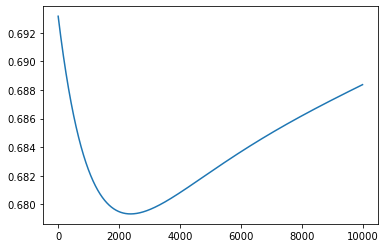

In [6]:
log = np.array(log)
plt.plot(log[:,0],log[:,1])

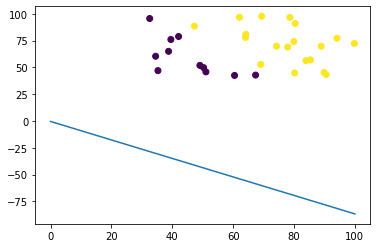

In [7]:
#可视化
plt.scatter(x_test[:,0],x_test[:,1],c= y_test.flatten())
x = np.linspace(0,100,10)
y = (-minw[0]*x-minw[2])/minw[1]
plt.plot(x,y)

In [8]:
#正则化
w1 = np.zeros((feature_num+1,1))
#print(w1)
p = 0.1#参数λ
log1 = []
log1_test =[]
minloss =1

def Loss1(h,y,w,p):
    return -np.mean(y*np.log(h)+(1-y)*np.log(1-h))+p*np.mean(w1.T*w1)/(2*h.shape[0])

for i in range(repeat):
    h1 = np.matmul(x_train,w1)
    h1 = Logis(h1)
    ter0 = learn*np.mean((h1[0]-y_train[0].reshape(-1,1))*x_train[:,0].reshape(-1,1), axis=0).reshape(-1,1)
    ter0 =w1[0]-ter0#第一项不变
    term = learn*np.mean((h1-y_train.reshape(-1,1))*x_train, axis=0).reshape(-1,1)+learn*p*w1/h1.shape[0]
    w1= w1 -term
    w1[0] = ter0
    #print(w1)
    
    h1_test = np.matmul(x_test,w1)
    h1_test = Logis(h1_test)
    
    loss1 = Loss1(h1,y_train,w1,p)
    loss1_test = Loss1(h1_test,y_test,w1,p)
    print('i:{},loss:{}'.format(i,loss1))
    log1.append([i,loss1])
    log1_test.append([i,loss1_test])
    
    if minloss>loss1:
        minw=w1
        minloss = loss1
    
print(minloss,minw)

i:0,loss:0.6931471805770958
i:1,loss:0.6931231816256658
i:2,loss:0.6930992138949864
i:3,loss:0.6930752773552811
i:4,loss:0.6930513719767973
i:5,loss:0.6930274977298071
i:6,loss:0.6930036545846062
i:7,loss:0.6929798425115155
i:8,loss:0.6929560614808795
i:9,loss:0.6929323114630672
i:10,loss:0.6929085924284716
i:11,loss:0.6928849043475102
i:12,loss:0.6928612471906248
i:13,loss:0.692837620928281
i:14,loss:0.6928140255309692
i:15,loss:0.692790460969203
i:16,loss:0.6927669272135213
i:17,loss:0.6927434242344865
i:18,loss:0.692719952002685
i:19,loss:0.6926965104887277
i:20,loss:0.6926730996632497
i:21,loss:0.6926497194969097
i:22,loss:0.6926263699603908
i:23,loss:0.6926030510244002
i:24,loss:0.6925797626596688
i:25,loss:0.6925565048369522
i:26,loss:0.6925332775270295
i:27,loss:0.6925100807007037
i:28,loss:0.6924869143288024
i:29,loss:0.6924637783821768
i:30,loss:0.6924406728317017
i:31,loss:0.6924175976482767
i:32,loss:0.6923945528028248
i:33,loss:0.6923715382662929
i:34,loss:0.692348554009652

i:829,loss:0.6815806928380589
i:830,loss:0.6815743878146611
i:831,loss:0.6815680963722096
i:832,loss:0.6815618184964106
i:833,loss:0.6815555541729834
i:834,loss:0.6815493033876607
i:835,loss:0.681543066126189
i:836,loss:0.6815368423743275
i:837,loss:0.681530632117849
i:838,loss:0.6815244353425398
i:839,loss:0.6815182520341996
i:840,loss:0.6815120821786408
i:841,loss:0.6815059257616893
i:842,loss:0.6814997827691849
i:843,loss:0.6814936531869799
i:844,loss:0.6814875370009401
i:845,loss:0.681481434196945
i:846,loss:0.6814753447608863
i:847,loss:0.68146926867867
i:848,loss:0.6814632059362147
i:849,loss:0.6814571565194524
i:850,loss:0.681451120414328
i:851,loss:0.6814450976068002
i:852,loss:0.6814390880828403
i:853,loss:0.6814330918284327
i:854,loss:0.6814271088295755
i:855,loss:0.6814211390722793
i:856,loss:0.6814151825425685
i:857,loss:0.68140923922648
i:858,loss:0.6814033091100641
i:859,loss:0.6813973921793841
i:860,loss:0.6813914884205166
i:861,loss:0.6813855978195508
i:862,loss:0.68137

C:\Users\江一飞\AppData\Local\Temp\ipykernel_40932\811481461.py:10: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y*np.log(h)+(1-y)*np.log(1-h))+p*np.mean(w1.T*w1)/(2*h.shape[0])
C:\Users\江一飞\AppData\Local\Temp\ipykernel_40932\811481461.py:10: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y*np.log(h)+(1-y)*np.log(1-h))+p*np.mean(w1.T*w1)/(2*h.shape[0])


i:1742,loss:0.6800028065111579
i:1743,loss:0.6800043546199422
i:1744,loss:0.6800059076078402
i:1745,loss:0.6800074654689588
i:1746,loss:0.6800090281974114
i:1747,loss:0.6800105957873157
i:1748,loss:0.6800121682327971
i:1749,loss:0.6800137455279858
i:1750,loss:0.6800153276670183
i:1751,loss:0.6800169146440366
i:1752,loss:0.6800185064531888
i:1753,loss:0.6800201030886291
i:1754,loss:0.6800217045445173
i:1755,loss:0.6800233108150185
i:1756,loss:0.6800249218943047
i:1757,loss:0.680026537776553
i:1758,loss:0.6800281584559468
i:1759,loss:0.6800297839266746
i:1760,loss:0.6800314141829314
i:1761,loss:0.6800330492189178
i:1762,loss:0.6800346890288401
i:1763,loss:0.6800363336069107
i:1764,loss:0.6800379829473475
i:1765,loss:0.680039637044374
i:1766,loss:0.6800412958922202
i:1767,loss:0.680042959485121
i:1768,loss:0.6800446278173179
i:1769,loss:0.6800463008830574
i:1770,loss:0.6800479786765924
i:1771,loss:0.6800496611921812
i:1772,loss:0.680051348424088
i:1773,loss:0.6800530403665828
i:1774,loss:

i:2697,loss:0.6830224433281878
i:2698,loss:0.6830266574479094
i:2699,loss:0.683030872849741
i:2700,loss:0.6830350895314912
i:2701,loss:0.6830393074909712
i:2702,loss:0.6830435267259938
i:2703,loss:0.6830477472343748
i:2704,loss:0.6830519690139324
i:2705,loss:0.6830561920624868
i:2706,loss:0.6830604163778606
i:2707,loss:0.683064641957879
i:2708,loss:0.6830688688003694
i:2709,loss:0.6830730969031613
i:2710,loss:0.6830773262640871
i:2711,loss:0.6830815568809813
i:2712,loss:0.6830857887516802
i:2713,loss:0.6830900218740233
i:2714,loss:0.6830942562458517
i:2715,loss:0.6830984918650096
i:2716,loss:0.6831027287293429
i:2717,loss:0.6831069668366999
i:2718,loss:0.6831112061849316
i:2719,loss:0.683115446771891
i:2720,loss:0.6831196885954336
i:2721,loss:0.6831239316534168
i:2722,loss:0.6831281759437009
i:2723,loss:0.6831324214641482
i:2724,loss:0.6831366682126233
i:2725,loss:0.6831409161869934
i:2726,loss:0.6831451653851276
i:2727,loss:0.6831494158048975
i:2728,loss:0.6831536674441769
i:2729,loss

i:3621,loss:0.687236069533687
i:3622,loss:0.6872407850010817
i:3623,loss:0.687245500488945
i:3624,loss:0.6872502159965245
i:3625,loss:0.6872549315230683
i:3626,loss:0.6872596470678253
i:3627,loss:0.6872643626300461
i:3628,loss:0.6872690782089813
i:3629,loss:0.687273793803883
i:3630,loss:0.6872785094140043
i:3631,loss:0.6872832250385988
i:3632,loss:0.6872879406769218
i:3633,loss:0.6872926563282287
i:3634,loss:0.6872973719917763
i:3635,loss:0.6873020876668223
i:3636,loss:0.6873068033526253
i:3637,loss:0.6873115190484448
i:3638,loss:0.6873162347535415
i:3639,loss:0.6873209504671767
i:3640,loss:0.6873256661886126
i:3641,loss:0.6873303819171126
i:3642,loss:0.6873350976519409
i:3643,loss:0.687339813392363
i:3644,loss:0.6873445291376447
i:3645,loss:0.687349244887053
i:3646,loss:0.687353960639856
i:3647,loss:0.6873586763953227
i:3648,loss:0.6873633921527227
i:3649,loss:0.6873681079113267
i:3650,loss:0.6873728236704068
i:3651,loss:0.6873775394292352
i:3652,loss:0.6873822551870855
i:3653,loss:0.

i:4353,loss:0.6906540826449896
i:4354,loss:0.6906586637681584
i:4355,loss:0.6906632445628478
i:4356,loss:0.6906678250287965
i:4357,loss:0.6906724051657446
i:4358,loss:0.6906769849734319
i:4359,loss:0.6906815644515987
i:4360,loss:0.6906861435999866
i:4361,loss:0.6906907224183363
i:4362,loss:0.69069530090639
i:4363,loss:0.69069987906389
i:4364,loss:0.6907044568905788
i:4365,loss:0.6907090343862
i:4366,loss:0.6907136115504968
i:4367,loss:0.6907181883832136
i:4368,loss:0.6907227648840949
i:4369,loss:0.6907273410528855
i:4370,loss:0.6907319168893308
i:4371,loss:0.6907364923931766
i:4372,loss:0.6907410675641694
i:4373,loss:0.6907456424020558
i:4374,loss:0.6907502169065831
i:4375,loss:0.6907547910774987
i:4376,loss:0.6907593649145509
i:4377,loss:0.6907639384174882
i:4378,loss:0.6907685115860591
i:4379,loss:0.6907730844200136
i:4380,loss:0.690777656919101
i:4381,loss:0.6907822290830719
i:4382,loss:0.6907868009116767
i:4383,loss:0.6907913724046667
i:4384,loss:0.6907959435617935
i:4385,loss:0.69

i:5292,loss:0.6947872063657398
i:5293,loss:0.6947914130985801
i:5294,loss:0.6947956194030478
i:5295,loss:0.6947998252791459
i:5296,loss:0.694804030726877
i:5297,loss:0.6948082357462452
i:5298,loss:0.6948124403372535
i:5299,loss:0.6948166444999058
i:5300,loss:0.6948208482342056
i:5301,loss:0.6948250515401572
i:5302,loss:0.6948292544177643
i:5303,loss:0.6948334568670316
i:5304,loss:0.694837658887963
i:5305,loss:0.6948418604805635
i:5306,loss:0.6948460616448375
i:5307,loss:0.6948502623807902
i:5308,loss:0.6948544626884262
i:5309,loss:0.6948586625677512
i:5310,loss:0.6948628620187702
i:5311,loss:0.6948670610414887
i:5312,loss:0.6948712596359122
i:5313,loss:0.6948754578020468
i:5314,loss:0.6948796555398983
i:5315,loss:0.6948838528494728
i:5316,loss:0.6948880497307767
i:5317,loss:0.694892246183816
i:5318,loss:0.6948964422085975
i:5319,loss:0.694900637805128
i:5320,loss:0.6949048329734143
i:5321,loss:0.6949090277134633
i:5322,loss:0.6949132220252822
i:5323,loss:0.6949174159088783
i:5324,loss:

i:6277,loss:0.6987285382204561
i:6278,loss:0.6987323429955614
i:6279,loss:0.6987361473965392
i:6280,loss:0.6987399514234769
i:6281,loss:0.6987437550764624
i:6282,loss:0.6987475583555837
i:6283,loss:0.6987513612609282
i:6284,loss:0.6987551637925841
i:6285,loss:0.6987589659506391
i:6286,loss:0.6987627677351813
i:6287,loss:0.6987665691462985
i:6288,loss:0.6987703701840791
i:6289,loss:0.6987741708486106
i:6290,loss:0.6987779711399813
i:6291,loss:0.6987817710582794
i:6292,loss:0.6987855706035929
i:6293,loss:0.6987893697760104
i:6294,loss:0.6987931685756195
i:6295,loss:0.6987969670025087
i:6296,loss:0.6988007650567662
i:6297,loss:0.6988045627384807
i:6298,loss:0.69880836004774
i:6299,loss:0.698812156984633
i:6300,loss:0.6988159535492477
i:6301,loss:0.6988197497416728
i:6302,loss:0.6988235455619968
i:6303,loss:0.698827341010308
i:6304,loss:0.6988311360866952
i:6305,loss:0.6988349307912468
i:6306,loss:0.6988387251240517
i:6307,loss:0.6988425190851981
i:6308,loss:0.6988463126747751
i:6309,loss:

i:7277,loss:0.7023619867409789
i:7278,loss:0.7023654646915162
i:7279,loss:0.7023689423641616
i:7280,loss:0.7023724197590127
i:7281,loss:0.7023758968761673
i:7282,loss:0.7023793737157231
i:7283,loss:0.7023828502777775
i:7284,loss:0.7023863265624284
i:7285,loss:0.7023898025697737
i:7286,loss:0.7023932782999105
i:7287,loss:0.7023967537529368
i:7288,loss:0.70240022892895
i:7289,loss:0.702403703828048
i:7290,loss:0.7024071784503281
i:7291,loss:0.7024106527958884
i:7292,loss:0.702414126864826
i:7293,loss:0.7024176006572387
i:7294,loss:0.7024210741732241
i:7295,loss:0.7024245474128797
i:7296,loss:0.7024280203763031
i:7297,loss:0.7024314930635918
i:7298,loss:0.7024349654748435
i:7299,loss:0.7024384376101558
i:7300,loss:0.7024419094696259
i:7301,loss:0.7024453810533515
i:7302,loss:0.7024488523614304
i:7303,loss:0.7024523233939597
i:7304,loss:0.7024557941510371
i:7305,loss:0.70245926463276
i:7306,loss:0.702462734839226
i:7307,loss:0.7024662047705326
i:7308,loss:0.7024696744267771
i:7309,loss:0.7

i:8266,loss:0.7056811679649593
i:8267,loss:0.7056844168814416
i:8268,loss:0.7056876656102439
i:8269,loss:0.705690914151449
i:8270,loss:0.7056941625051398
i:8271,loss:0.7056974106713989
i:8272,loss:0.7057006586503092
i:8273,loss:0.7057039064419532
i:8274,loss:0.7057071540464139
i:8275,loss:0.705710401463774
i:8276,loss:0.7057136486941159
i:8277,loss:0.7057168957375224
i:8278,loss:0.7057201425940762
i:8279,loss:0.7057233892638598
i:8280,loss:0.7057266357469559
i:8281,loss:0.7057298820434471
i:8282,loss:0.7057331281534158
i:8283,loss:0.7057363740769447
i:8284,loss:0.7057396198141161
i:8285,loss:0.7057428653650129
i:8286,loss:0.7057461107297173
i:8287,loss:0.7057493559083117
i:8288,loss:0.7057526009008787
i:8289,loss:0.7057558457075005
i:8290,loss:0.7057590903282598
i:8291,loss:0.7057623347632388
i:8292,loss:0.7057655790125198
i:8293,loss:0.7057688230761854
i:8294,loss:0.7057720669543178
i:8295,loss:0.7057753106469992
i:8296,loss:0.705778554154312
i:8297,loss:0.7057817974763385
i:8298,loss

i:9346,loss:0.7090968511615284
i:9347,loss:0.7090999414191722
i:9348,loss:0.7091030315668002
i:9349,loss:0.7091061216044736
i:9350,loss:0.7091092115322535
i:9351,loss:0.7091123013502006
i:9352,loss:0.7091153910583761
i:9353,loss:0.7091184806568406
i:9354,loss:0.709121570145655
i:9355,loss:0.7091246595248802
i:9356,loss:0.7091277487945771
i:9357,loss:0.7091308379548064
i:9358,loss:0.7091339270056289
i:9359,loss:0.7091370159471054
i:9360,loss:0.7091401047792969
i:9361,loss:0.7091431935022637
i:9362,loss:0.7091462821160667
i:9363,loss:0.7091493706207668
i:9364,loss:0.7091524590164243
i:9365,loss:0.7091555473031
i:9366,loss:0.7091586354808546
i:9367,loss:0.7091617235497488
i:9368,loss:0.7091648115098431
i:9369,loss:0.709167899361198
i:9370,loss:0.7091709871038739
i:9371,loss:0.7091740747379316
i:9372,loss:0.7091771622634315
i:9373,loss:0.7091802496804344
i:9374,loss:0.7091833369890004
i:9375,loss:0.70918642418919
i:9376,loss:0.7091895112810637
i:9377,loss:0.709192598264682
i:9378,loss:0.70

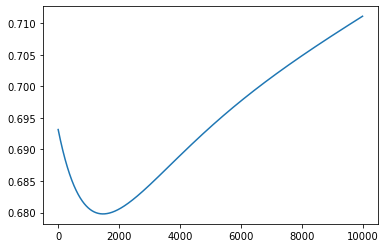

In [9]:
log1 = np.array(log1)
plt.plot(log1[:,0],log1[:,1])

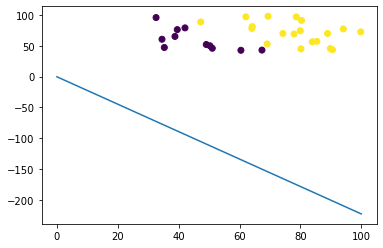

In [10]:
#可视化
plt.scatter(x_test[:,0],x_test[:,1],c= y_test.flatten())
x = np.linspace(0,100,10)
y = (-minw[0]*x-minw[2])/minw[1]
plt.plot(x,y)